#EVALUATION OF MACHINE LEARNING ALGORITHMS FOR MUSICAL KEY DETECTION


## Part 1 : Loading The Datasets

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [ ]:
def normalize(pcp):
    normalized =  pcp/sum(pcp)
    return normalized

In [ ]:
M21B = pd.read_pickle("../datasets/M21B.pkl")
GS =  pd.read_pickle("../datasets/GIANTSTEPS.pkl")
LMD = pd.read_csv("../datasets/LMD.csv")

In [ ]:
X_M = np.apply_along_axis(normalize, axis=1, arr=np.array(M21B)[:, 0:12])
y_M = np.array(M21B)[:, 12]

X_G = np.apply_along_axis(normalize, axis=1, arr=np.array(list(GS['PCP'])))
y_G = np.array(list(GS['key_encoding']))

X_L = np.apply_along_axis(normalize, axis=1, arr=np.array(LMD)[:, 0:12])
y_L = np.array(LMD)[:, 12]

shapes = pd.DataFrame([[np.shape(X_M), np.shape(X_G), np.shape(X_L)], [np.shape(y_M), np.shape(y_G), np.shape(y_L)]], columns=['MUSIC21', 'GIANTSTEPS', 'LAKH'], index = ['Features', 'Labels'])
shapes

,MUSIC21,GIANTSTEPS,LAKH
Features,"(51840, 12)","(604, 12)","(992, 12)"
Labels,"(51840,)","(604,)","(992,)"


In [ ]:
key_map = ['C major', 'Db major', 'D major', 'Eb major', 'E major', 'F major', 'Gb major', 'G major', 'Ab major', 'A major', 'Bb major', 'B major', 'C minor', 'Db minor', 'D minor', 'Eb minor', 'E minor', 'F minor', 'Gb minor', 'G minor', 'Ab minor', 'A minor', 'Bb minor', 'B minor']
def class_distriburion(y):
  distribution = [0]*24
  for i in range(24):
    distribution[i] = y.count(i)
  return distribution

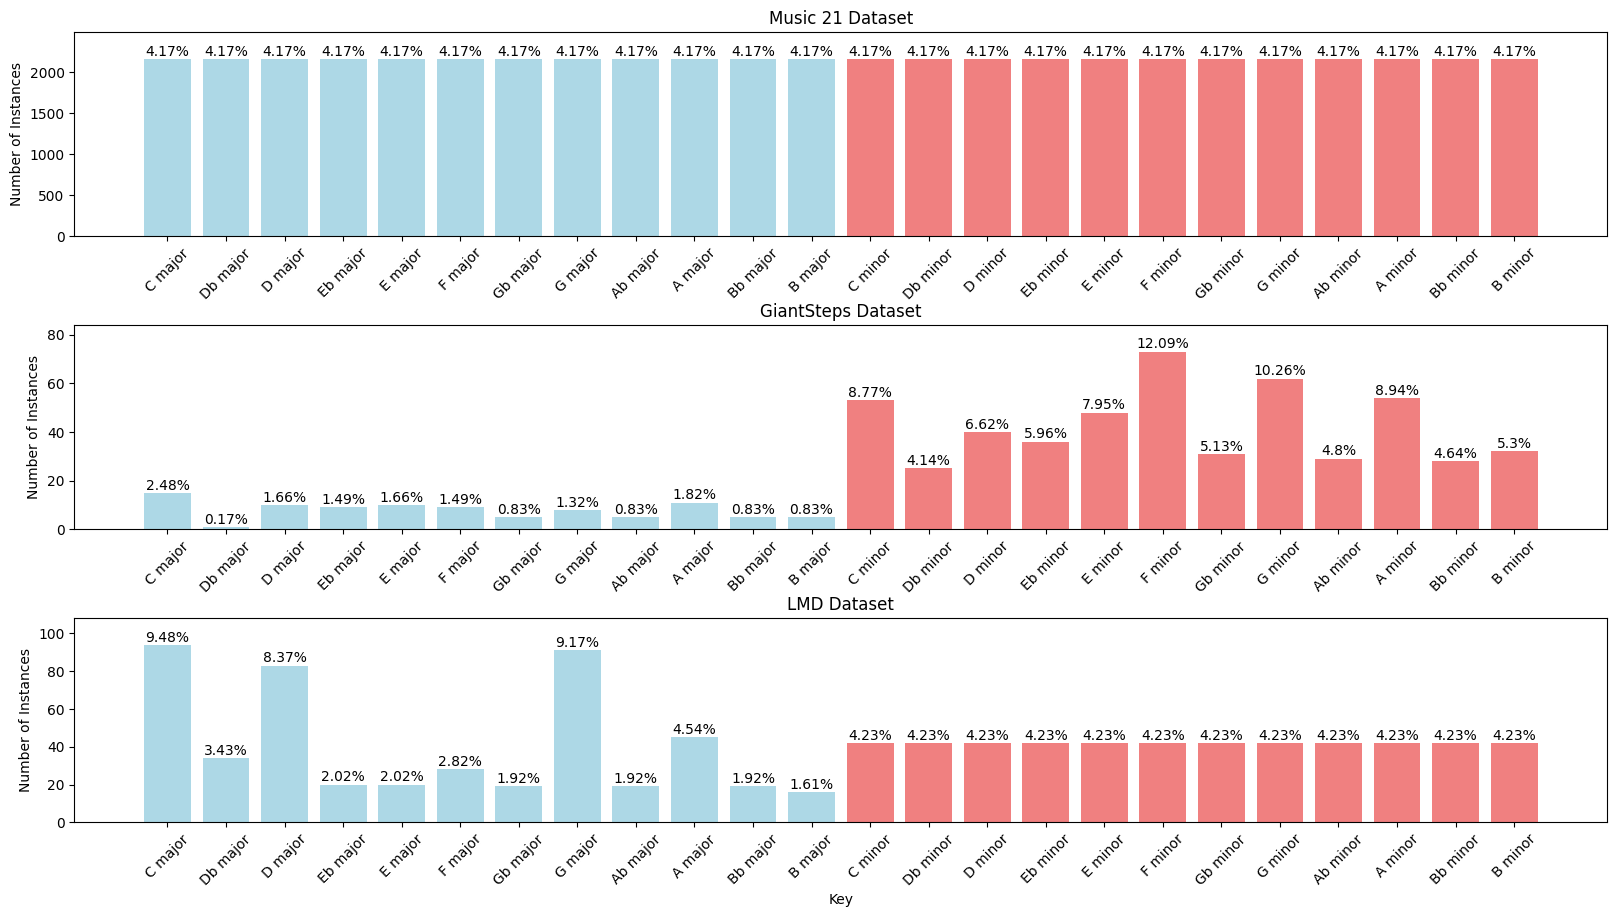

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(16, 9))

colors = ['lightblue' if i < 12 else 'lightcoral' for i in range(24)]
axs[0].set_title('Music 21 Dataset')
axs[0].set_ylabel('Number of Instances')
axs[0].set_ylim(0,max(class_distriburion(list(M21B['key'])))*1.15)
axs[0].set_xticks([i for i in range(24)],labels = key_map,rotation=45)
bars0 = axs[0].bar(key_map, height = class_distriburion(list(M21B['key'])), color = colors)
for bar in bars0:
  h = bar.get_height()
  axs[0].text(bar.get_x() + bar.get_width()/2, h + 0.2, str(round(h*100/len(M21B), 2)) + "%", ha='center', va='bottom')

axs[1].set_title('GiantSteps Dataset')
axs[1].set_ylabel('Number of Instances')
axs[1].set_ylim(0,max(class_distriburion(list(GS['key_encoding'])))*1.15)
axs[1].set_xticks([i for i in range(24)],labels = key_map,rotation=45)
bars1 = axs[1].bar(key_map, height = class_distriburion(list(GS['key_encoding'])), color = colors)
for bar in bars1:
  h = bar.get_height()
  axs[1].text(bar.get_x() + bar.get_width()/2, h + 0.2, str(round(h*100/len(GS), 2)) + "%", ha='center', va='bottom')

axs[2].set_title('LMD Dataset')
axs[2].set_xlabel('Key')
axs[2].set_ylabel('Number of Instances')
axs[2].set_ylim(0,max(class_distriburion(list(LMD['class_number'])))*1.15)
axs[2].set_xticks([i for i in range(24)],labels = key_map,rotation=45)
bars2 = axs[2].bar(key_map, height = class_distriburion(list(LMD['class_number'])), color = colors)
for bar in bars2:
  h = bar.get_height()
  axs[2].text(bar.get_x() + bar.get_width()/2, h + 0.2, str(round(h*100/len(LMD), 2)) + "%", ha='center', va='bottom')

plt.tight_layout(pad=(0.1))
plt.show()

##Part 2 : Establishing a Traditional Baseline

Using music21 we obtain the exact values of the KrumhanslSchmuckler Key Profiles

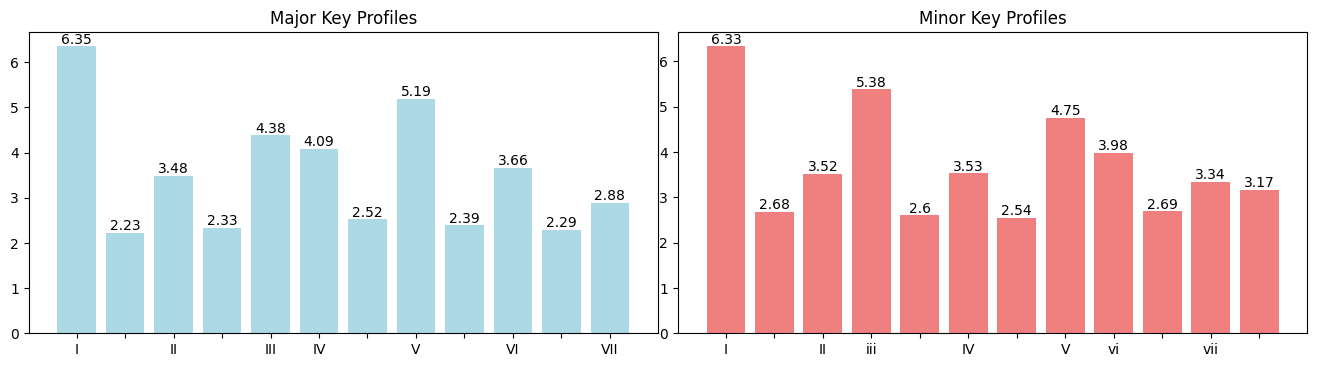

In [ ]:
from music21 import analysis
a = analysis.discrete.KrumhanslSchmuckler()

major_key_profile = np.array(a.getWeights('major'))
minor_key_profile = np.array(a.getWeights('minor'))

MAJClasses = ['I', ' ', 'II', '  ', 'III', 'IV', '   ', 'V', '    ', 'VI', '     ', 'VII']
MINClasses = ['I', ' ', 'II', 'iii', '  ', 'IV', '   ', 'V', 'vi', '    ', 'vii', '     ']
fig, axs = plt.subplots(1, 2, figsize=(13, 3.5))
axs[0].set_title("Major Key Profiles")
bars0 = axs[0].bar(MAJClasses, major_key_profile, color ="lightblue")
for bar in bars0:
  h = bar.get_height()
  axs[0].text(bar.get_x() + bar.get_width()/2, h, str(h) , ha='center', va='bottom')

axs[1].set_title("Minor Key Profiles")
bars1 = axs[1].bar(MINClasses, minor_key_profile, color = "lightcoral")
for bar in bars1:
  h = bar.get_height()
  axs[1].text(bar.get_x() + bar.get_width()/2, h, str(h) , ha='center', va='bottom')

plt.tight_layout(pad=0.1)
plt.show()

In [ ]:
class KS:

    def __init__(self, major_profile, minor_profile):
        self.name = 'KrumhanslSchmuckler Classifier'
        self.major_key_profile = major_profile
        self.minor_key_profile = minor_profile

    def pearson_correlation(self, x, y):
        x = np.array(x)
        y = np.array(y)

        x_bar = np.mean(x)
        y_bar = np.mean(y)

        X = x - x_bar
        Y = y - y_bar

        sum_XY = np.sum(X * Y)
        sum_X2 = np.sum(X ** 2)
        sum_Y2 = np.sum(Y ** 2)

        if sum_X2 * sum_Y2 == 0:
            return 0

        return sum_XY / np.sqrt(sum_X2 * sum_Y2)

    def transpose_from_C(self, pcp, new_tonic):
        return np.roll(pcp, new_tonic)

    def Traditional_Key_Detector(self, pcp):
        correlations = np.zeros(24)
        for tonic in range(12):
            major_transposed = self.transpose_from_C(self.major_key_profile, tonic)
            minor_transposed = self.transpose_from_C(self.minor_key_profile, tonic)

            correlations[tonic] = self.pearson_correlation(pcp, major_transposed)
            correlations[tonic + 12] = self.pearson_correlation(pcp, minor_transposed)

        return np.argmax(correlations)

    def predict(self, X):
        y_preds = [self.Traditional_Key_Detector(pcp) for pcp in X]
        return np.array(y_preds)

    def evaluate(self, X, y):
      y_preds = self.predict(X)
      count = 0
      for preds, true in zip(y_preds, y):
        if preds == true:
          count += 1
      accuracy = count/len(y)
      loss = 1-accuracy
      return loss, accuracy

## PART 3 : DEFINING OUR MACHINE LEARNING MODELS

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

1. KS classifier is the KrumhanslSchmuckler Key Profiles based classifier we made

2. NB, KNN, LDA and SVM are the classifiers used at the "Development of an intelligent model for musical key estimation using machine learning techniques" paper.

In [ ]:
classifier = {}
classifier['KS'] = KS(major_key_profile, minor_key_profile)
classifier['NB'] = GaussianNB()
classifier['KNN'] = KNeighborsClassifier(n_neighbors=5, metric='correlation')
classifier['LDA'] = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto', priors=None, n_components=None, store_covariance=True, tol=0.0001)
classifier['SVM'] = SVC(kernel='poly', degree=2)
classifier['MLP'] = MLPClassifier(hidden_layer_sizes=(24, 24), activation='relu', solver='adam', alpha=0.0001, batch_size=16, learning_rate='adaptive', learning_rate_init=0.001, max_iter=100)

###Our Custom Model

In [ ]:
#We define a function that performs the necessery Transformation on the input data

def normalize_profile(profile):
    # Calculate mean across the last axis
    mean = tf.reduce_mean(profile, axis=-1, keepdims=True)
    X = profile - mean
    sum_X2 = tf.reduce_sum(tf.square(X), axis=-1, keepdims=True)
    normalized = X / tf.sqrt(sum_X2)
    return normalized

@tf.function
def TransformInput(X):
    batch_size = tf.shape(X)[0]
    normalized = normalize_profile(X)

    # Extend each profile and concatenate
    extended = tf.concat([normalized, normalized[:, :11]], axis=1)

    # Reshape to match the desired output shape
    transformed = tf.reshape(extended, (batch_size, 23, 1))

    return transformed

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(12,)),
    tf.keras.layers.Lambda(TransformInput),
    tf.keras.layers.Conv1D(filters=2, kernel_size=12),
    tf.keras.layers.Permute((2, 1)),
    tf.keras.layers.Reshape((24,)),
    tf.keras.layers.Dense(24, activation='softmax')
])

b = normalize_profile(major_key_profile)
c = normalize_profile(minor_key_profile)

#The filter Weights are initialized using the KrumhanslSchmuckler Key Profiles
weigths = np.stack((np.array(b).reshape(12,1), np.array(c).reshape(12,1)), axis = -1)

conv_layer = model.layers[1]
conv_layer.set_weights([weigths, np.zeros(2)])

#The Dense Layer weights are initialized as to perform the KS algorithm
i_m = np.eye(12,12)
z_m = np.zeros((12, 12))
major_matrix = np.concatenate((i_m, z_m), axis = 1)
minor_matrix = np.concatenate((z_m, i_m), axis = 1)
dense_matrix = np.concatenate((major_matrix, minor_matrix), axis = 0)

dense_layer = model.layers[4]
dense_layer.set_weights([dense_matrix, np.zeros(24)])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_5 (Lambda)           (None, 23, 1)             0         
                                                                 
 conv1d_5 (Conv1D)           (None, 12, 2)             26        
                                                                 
 permute_5 (Permute)         (None, 2, 12)             0         
                                                                 
 reshape_5 (Reshape)         (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
Total params: 626 (2.45 KB)
Trainable params: 626 (2.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
classifier['CUSTOM'] = model

###PART 3.5 : PROOF OF CONCEPT

Here we make sure our untrained custom model behaves exactly as the KS algorithm

In [ ]:
accuracies = pd.DataFrame(np.zeros((2,3)), columns=['MUSIC21', 'GIANTSTEPS', 'LAKH'], index = ['KS', 'CUSTOM'])
accuracies['MUSIC21']['KS'] = classifier['KS'].evaluate(X_M, y_M)[1]
accuracies['MUSIC21']['CUSTOM'] = classifier['CUSTOM'].evaluate(X_M, y_M)[1]
accuracies['GIANTSTEPS']['KS'] = classifier['KS'].evaluate(X_G, y_G)[1]
accuracies['GIANTSTEPS']['CUSTOM'] = classifier['CUSTOM'].evaluate(X_G, y_G)[1]
accuracies['LAKH']['KS'] = classifier['KS'].evaluate(X_L, y_L)[1]
accuracies['LAKH']['CUSTOM'] = classifier['CUSTOM'].evaluate(X_L, y_L)[1]

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1620/1620 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7032 - loss: 2.4933
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3672 - loss: 2.7438
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 2.4706


In [ ]:
accuracies

,MUSIC21,GIANTSTEPS,LAKH
KS,0.699807,0.384106,0.685484
CUSTOM,0.699807,0.384106,0.685484


##PART 4 : DEFINING OUR METRICS

In [ ]:
def off_by_mode(y_test, y_pred):
  count = 0
  for actual, pred in zip(y_test, y_pred):
    if ((actual >= 12 and pred < 12) or (actual < 12 and pred >= 12)) and actual%12 == pred%12:
      count += 1
  return count/len(y_test)

def off_by_fifth(y_test, y_pred):
  count = 0
  for actual, pred in zip(y_test, y_pred):
    if ((actual >= 12 and pred >= 12) or (actual < 12 and pred < 12)) and (actual + 7)%12 == pred%12 or (actual - 7)%12 == pred%12:
      count += 1
  return count/len(y_test)

def off_by_relevant_key(y_test, y_pred):
  count = 0
  for actual, pred in zip(y_test, y_pred):
    if (actual < 12 and pred >= 12 and (actual + 9)%12 == pred%12) or (actual >= 12 and pred < 12 and (actual + 3)%12 == pred%12):
      count += 1
  return count/len(y_test)

def accuracy(y_test, y_pred):
  count = 0
  for actual, pred in zip(y_test, y_pred):
    if actual == pred:
      count += 1
  return count/len(y_test)

def completely_off(y_test, y_pred):
  return 1 - accuracy(y_test, y_pred) - off_by_relevant_key(y_test, y_pred) - off_by_fifth(y_test, y_pred) - off_by_mode(y_test, y_pred)

##PART 5 : TRAINING AND EVALUATING WITHIN THE MUSIC21 DATASET

In [ ]:
X_M_train, X_M_test, y_M_train, y_M_test = train_test_split(X_M, y_M, test_size=0.4, random_state=42)

TRAINING...

In [ ]:
trainable_models = ['NB', 'KNN', 'LDA', 'SVM', 'MLP','CUSTOM']
for model_name in trainable_models:
  if model_name != 'CUSTOM':
    classifier[model_name].fit(X_M_train, y_M_train)
  else:
    classifier[model_name].fit(X_M_train, y_M_train, epochs=40, batch_size=16)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1944/1944 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7724 - loss: 1.5105
Epoch 2/40
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7983 - loss: 0.7747
Epoch 3/40
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7952 - loss: 0.7808
Epoch 4/40
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8024 - loss: 0.7562
Epoch 5/40
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8044 - loss: 0.7562
Epoch 6/40
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7948 - loss: 0.7689
Epoch 7/40
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7965 - loss: 0.7761
Epoch 8/40
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7999 - loss: 0.7531
Epoch 9/40
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7973 - loss: 0.7693
Epoch 10/40
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8002 - loss: 0.7486
Epoch 11/40
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8006 - loss: 0.7630
Epoch 12/40
1944/1944 ━━━━━━━━━━━━━━━━━━━

EVALUATING...

In [ ]:
all_models = ['KS'] + trainable_models
EVAL_SCORES = np.zeros((8, 7))
for i, model_name in enumerate(all_models):
  y_preds = classifier[model_name].predict(X_M_test)
  if model_name == 'CUSTOM':
    y_preds = np.argmax(y_preds, axis = 1)
  EVAL_SCORES[0, i] = accuracy(y_M_test, y_preds)
  EVAL_SCORES[1, i] = recall_score(y_M_test, y_preds, average='macro')
  EVAL_SCORES[2, i] = precision_score(y_M_test, y_preds, average='macro')
  EVAL_SCORES[3, i] = f1_score(y_M_test, y_preds, average='macro')
  EVAL_SCORES[4, i] = off_by_relevant_key(y_M_test, y_preds)
  EVAL_SCORES[5, i] = off_by_fifth(y_M_test, y_preds)
  EVAL_SCORES[6, i] = off_by_mode(y_M_test, y_preds)
  EVAL_SCORES[7, i] = completely_off(y_M_test, y_preds)

eval_df = pd.DataFrame(EVAL_SCORES, columns = all_models, index =['Accuracy', 'Recall', 'Precision', 'F1 Score','Relevant Key', 'Off by a Fifth', 'Wrong Mode', 'Completely Off'])
eval_df

648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


,KS,NB,KNN,LDA,SVM,MLP,CUSTOM
Accuracy,0.702498,0.781732,0.808787,0.795476,0.820216,0.802276,0.804109
Recall,0.702585,0.781830,0.808778,0.795499,0.820269,0.802336,0.804147
Precision,0.702637,0.784706,0.809261,0.795832,0.821656,0.803478,0.804388
F1 Score,0.702511,0.782280,0.808784,0.795529,0.820509,0.802454,0.804052
Relevant Key,0.060860,0.086998,0.063802,0.071759,0.063706,0.071759,0.072868
Off by a Fifth,0.112992,0.060909,0.055122,0.055748,0.052083,0.054880,0.051842
Wrong Mode,0.028308,0.023148,0.022521,0.024306,0.021943,0.024354,0.024113
Completely Off,0.095341,0.047213,0.049769,0.052710,0.042052,0.046730,0.047068


##PART 6 : EVALUATING OUR MODELS ON THE LAKH MIDI DATASET

In [ ]:
EVAL_SCORES_L = np.zeros((8, 7))
for i, model_name in enumerate(all_models):
  y_preds = classifier[model_name].predict(X_L)
  if model_name == 'CUSTOM':
    y_preds = np.argmax(y_preds, axis = 1)
  EVAL_SCORES_L[0, i] = accuracy(y_L, y_preds)
  EVAL_SCORES_L[1, i] = recall_score(y_L, y_preds, average='macro')
  EVAL_SCORES_L[2, i] = precision_score(y_L, y_preds, average='macro')
  EVAL_SCORES_L[3, i] = f1_score(y_L, y_preds, average='macro')
  EVAL_SCORES_L[4, i] = off_by_relevant_key(y_L, y_preds)
  EVAL_SCORES_L[5, i] = off_by_fifth(y_L, y_preds)
  EVAL_SCORES_L[6, i] = off_by_mode(y_L, y_preds)
  EVAL_SCORES_L[7, i] = completely_off(y_L, y_preds)

eval_df_L = pd.DataFrame(EVAL_SCORES_L, columns = all_models, index =['Accuracy', 'Recall', 'Precision', 'F1 Score','Relevant Key', 'Off by a Fifth', 'Wrong Mode', 'Completely Off'])
eval_df_L

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,KS,NB,KNN,LDA,SVM,MLP,CUSTOM
Accuracy,0.685484,0.678427,0.612903,0.684476,0.682460,0.697581,0.700605
Recall,0.680720,0.676971,0.612810,0.681280,0.679921,0.693330,0.700513
Precision,0.672537,0.650384,0.584453,0.652170,0.651649,0.667381,0.675343
F1 Score,0.656856,0.650816,0.575935,0.656993,0.651243,0.667768,0.675462
Relevant Key,0.129032,0.154234,0.163306,0.107863,0.122984,0.118952,0.115927
Off by a Fifth,0.139113,0.120968,0.137097,0.143145,0.138105,0.129032,0.119960
Wrong Mode,0.016129,0.016129,0.027218,0.021169,0.018145,0.017137,0.019153
Completely Off,0.030242,0.030242,0.059476,0.043347,0.038306,0.037298,0.044355


##PART 7 : EVALUATING OUR MODELS ON THE GIANT STEPS DATASET

In [ ]:
EVAL_SCORES_G = np.zeros((8, 7))
for i, model_name in enumerate(all_models):
  y_preds = classifier[model_name].predict(X_G)
  if model_name == 'CUSTOM':
    y_preds = np.argmax(y_preds, axis = 1)
  EVAL_SCORES_G[0, i] = accuracy(y_G, y_preds)
  EVAL_SCORES_G[1, i] = recall_score(y_G, y_preds, average='macro')
  EVAL_SCORES_G[2, i] = precision_score(y_G, y_preds, average='macro')
  EVAL_SCORES_G[3, i] = f1_score(y_G, y_preds, average='macro')
  EVAL_SCORES_G[4, i] = off_by_relevant_key(y_G, y_preds)
  EVAL_SCORES_G[5, i] = off_by_fifth(y_G, y_preds)
  EVAL_SCORES_G[6, i] = off_by_mode(y_G, y_preds)
  EVAL_SCORES_G[7, i] = completely_off(y_G, y_preds)

eval_df_G = pd.DataFrame(EVAL_SCORES_G, columns = all_models, index =['Accuracy', 'Recall', 'Precision', 'F1 Score','Relevant Key', 'Off by a Fifth', 'Wrong Mode', 'Completely Off'])
eval_df_G

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,KS,NB,KNN,LDA,SVM,MLP,CUSTOM
Accuracy,0.384106,0.362583,0.380795,0.490066,0.379139,0.455298,0.438742
Recall,0.377420,0.362826,0.352644,0.462037,0.381316,0.461351,0.468000
Precision,0.351359,0.345884,0.363190,0.403279,0.383196,0.418696,0.411844
F1 Score,0.316299,0.308928,0.312708,0.400514,0.326991,0.384238,0.371312
Relevant Key,0.067881,0.117550,0.107616,0.094371,0.114238,0.092715,0.097682
Off by a Fifth,0.170530,0.150662,0.162252,0.137417,0.165563,0.147351,0.129139
Wrong Mode,0.122517,0.086093,0.071192,0.046358,0.089404,0.071192,0.092715
Completely Off,0.254967,0.283113,0.278146,0.231788,0.251656,0.233444,0.241722


In [ ]:
cnn_weights = classifier['CUSTOM'].layers[1].get_weights()
new_major_profile = cnn_weights[0][:, 0][:, 0]
new_minor_profile = cnn_weights[0][:, 0][:, 1]

new_major_profile = new_major_profile - np.min(new_major_profile)
new_minor_profile = new_minor_profile - np.min(new_minor_profile)

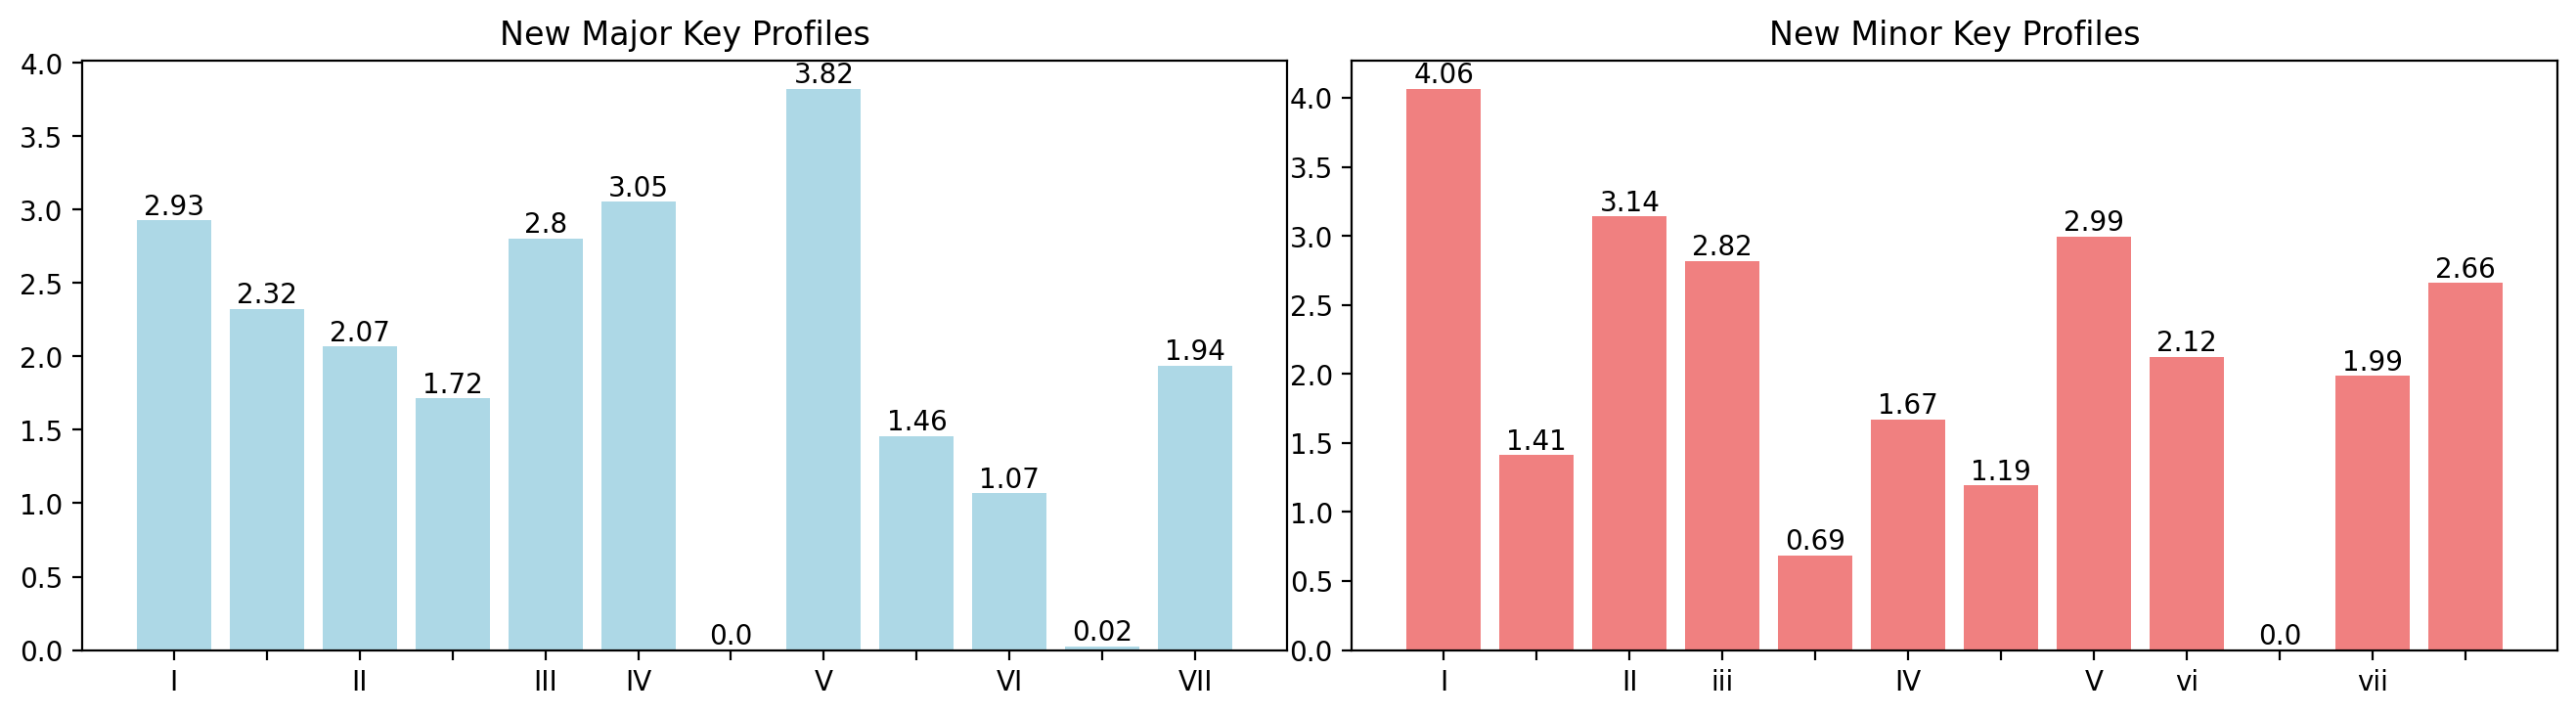

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(13, 3.5))
axs[0].set_title("New Major Key Profiles")
bars0 = axs[0].bar(MAJClasses, new_major_profile, color ="lightblue")
for bar in bars0:
  h = bar.get_height()
  axs[0].text(bar.get_x() + bar.get_width()/2, h, str(round(h,2)) , ha='center', va='bottom')

axs[1].set_title("New Minor Key Profiles")
bars1 = axs[1].bar(MINClasses, new_minor_profile, color = "lightcoral")
for bar in bars1:
  h = bar.get_height()
  axs[1].text(bar.get_x() + bar.get_width()/2, h, str(round(h,2)) , ha='center', va='bottom')

plt.tight_layout(pad=0.1)
plt.show()

In [ ]:
dense_weights = classifier['CUSTOM'].layers[4].get_weights()
np.shape(dense_weights[0])

(24, 24)

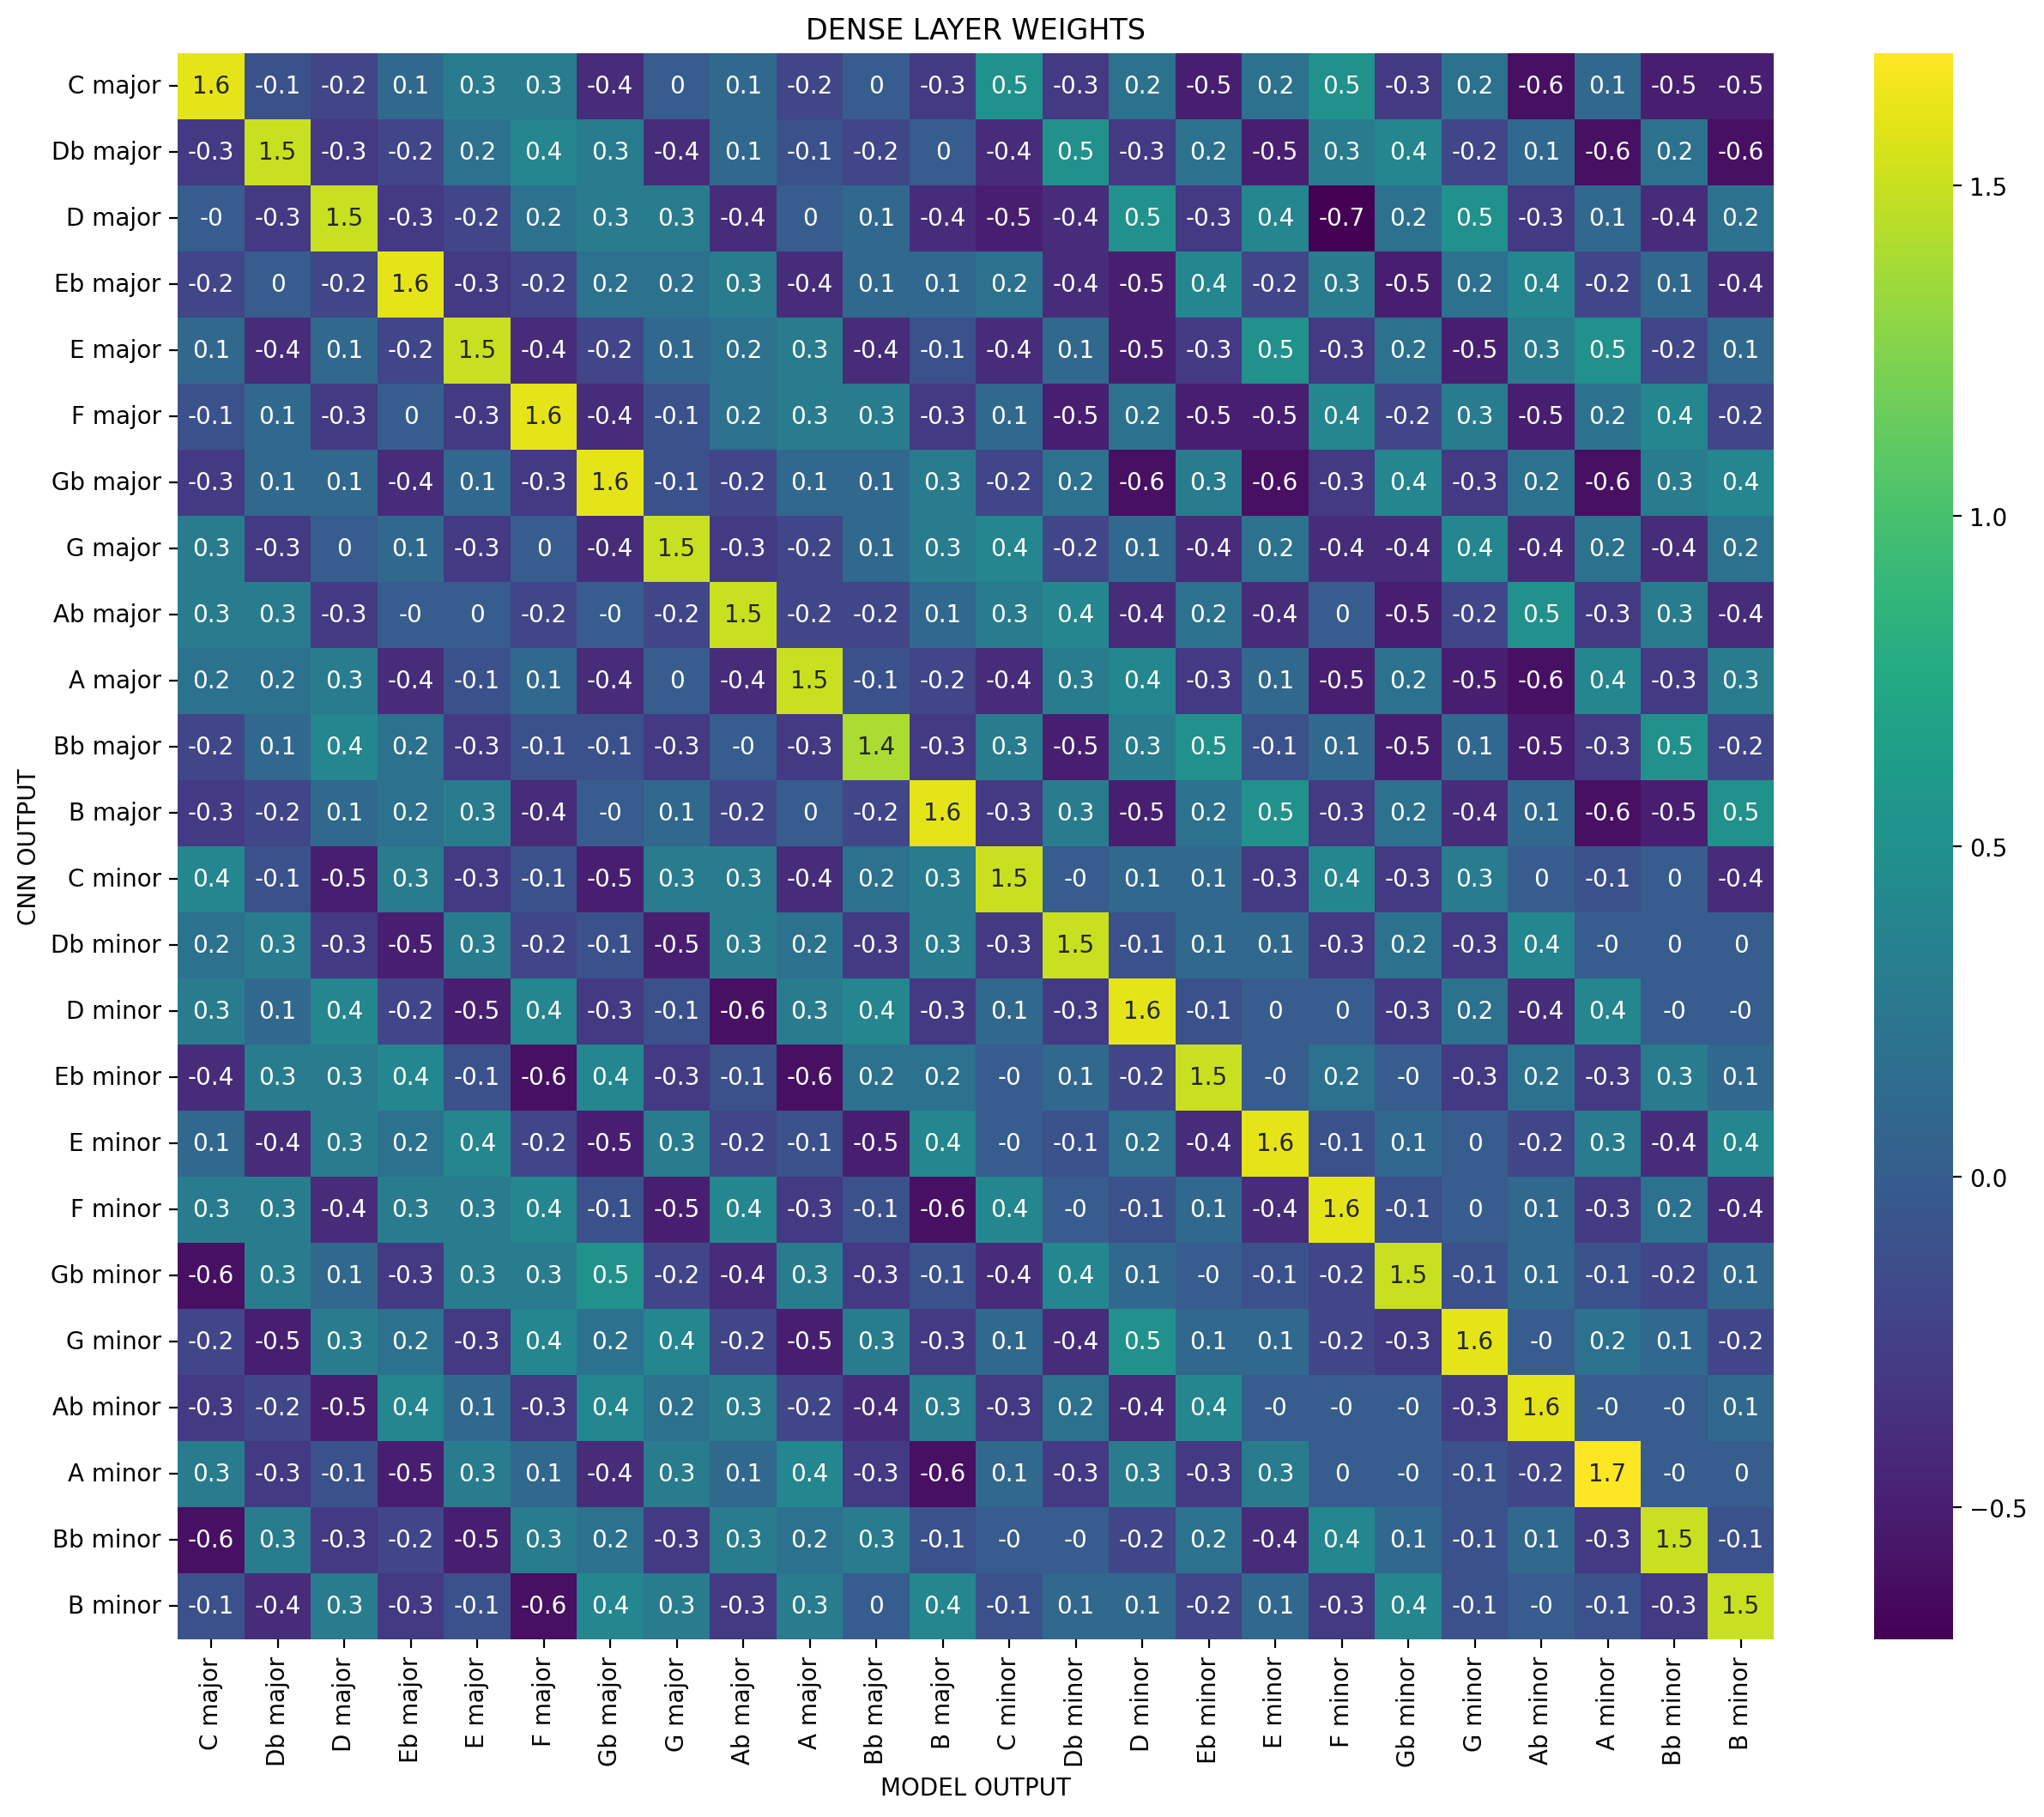

In [ ]:

plt.figure(figsize=(15, 12))
sns.heatmap(np.round(dense_weights[0],1), annot=True, cmap='viridis', xticklabels=key_map, yticklabels=key_map)
plt.xlabel('MODEL OUTPUT')
plt.ylabel('CNN OUTPUT')
plt.title('DENSE LAYER WEIGHTS')
plt.show()

## Average Pitch Class Distribution Comparison for The Datasets

In [ ]:
def average_pcp(key, X, y):
  indexes = np.where(y == key)
  av_pcp = np.mean(X[indexes], axis = 0)
  return av_pcp

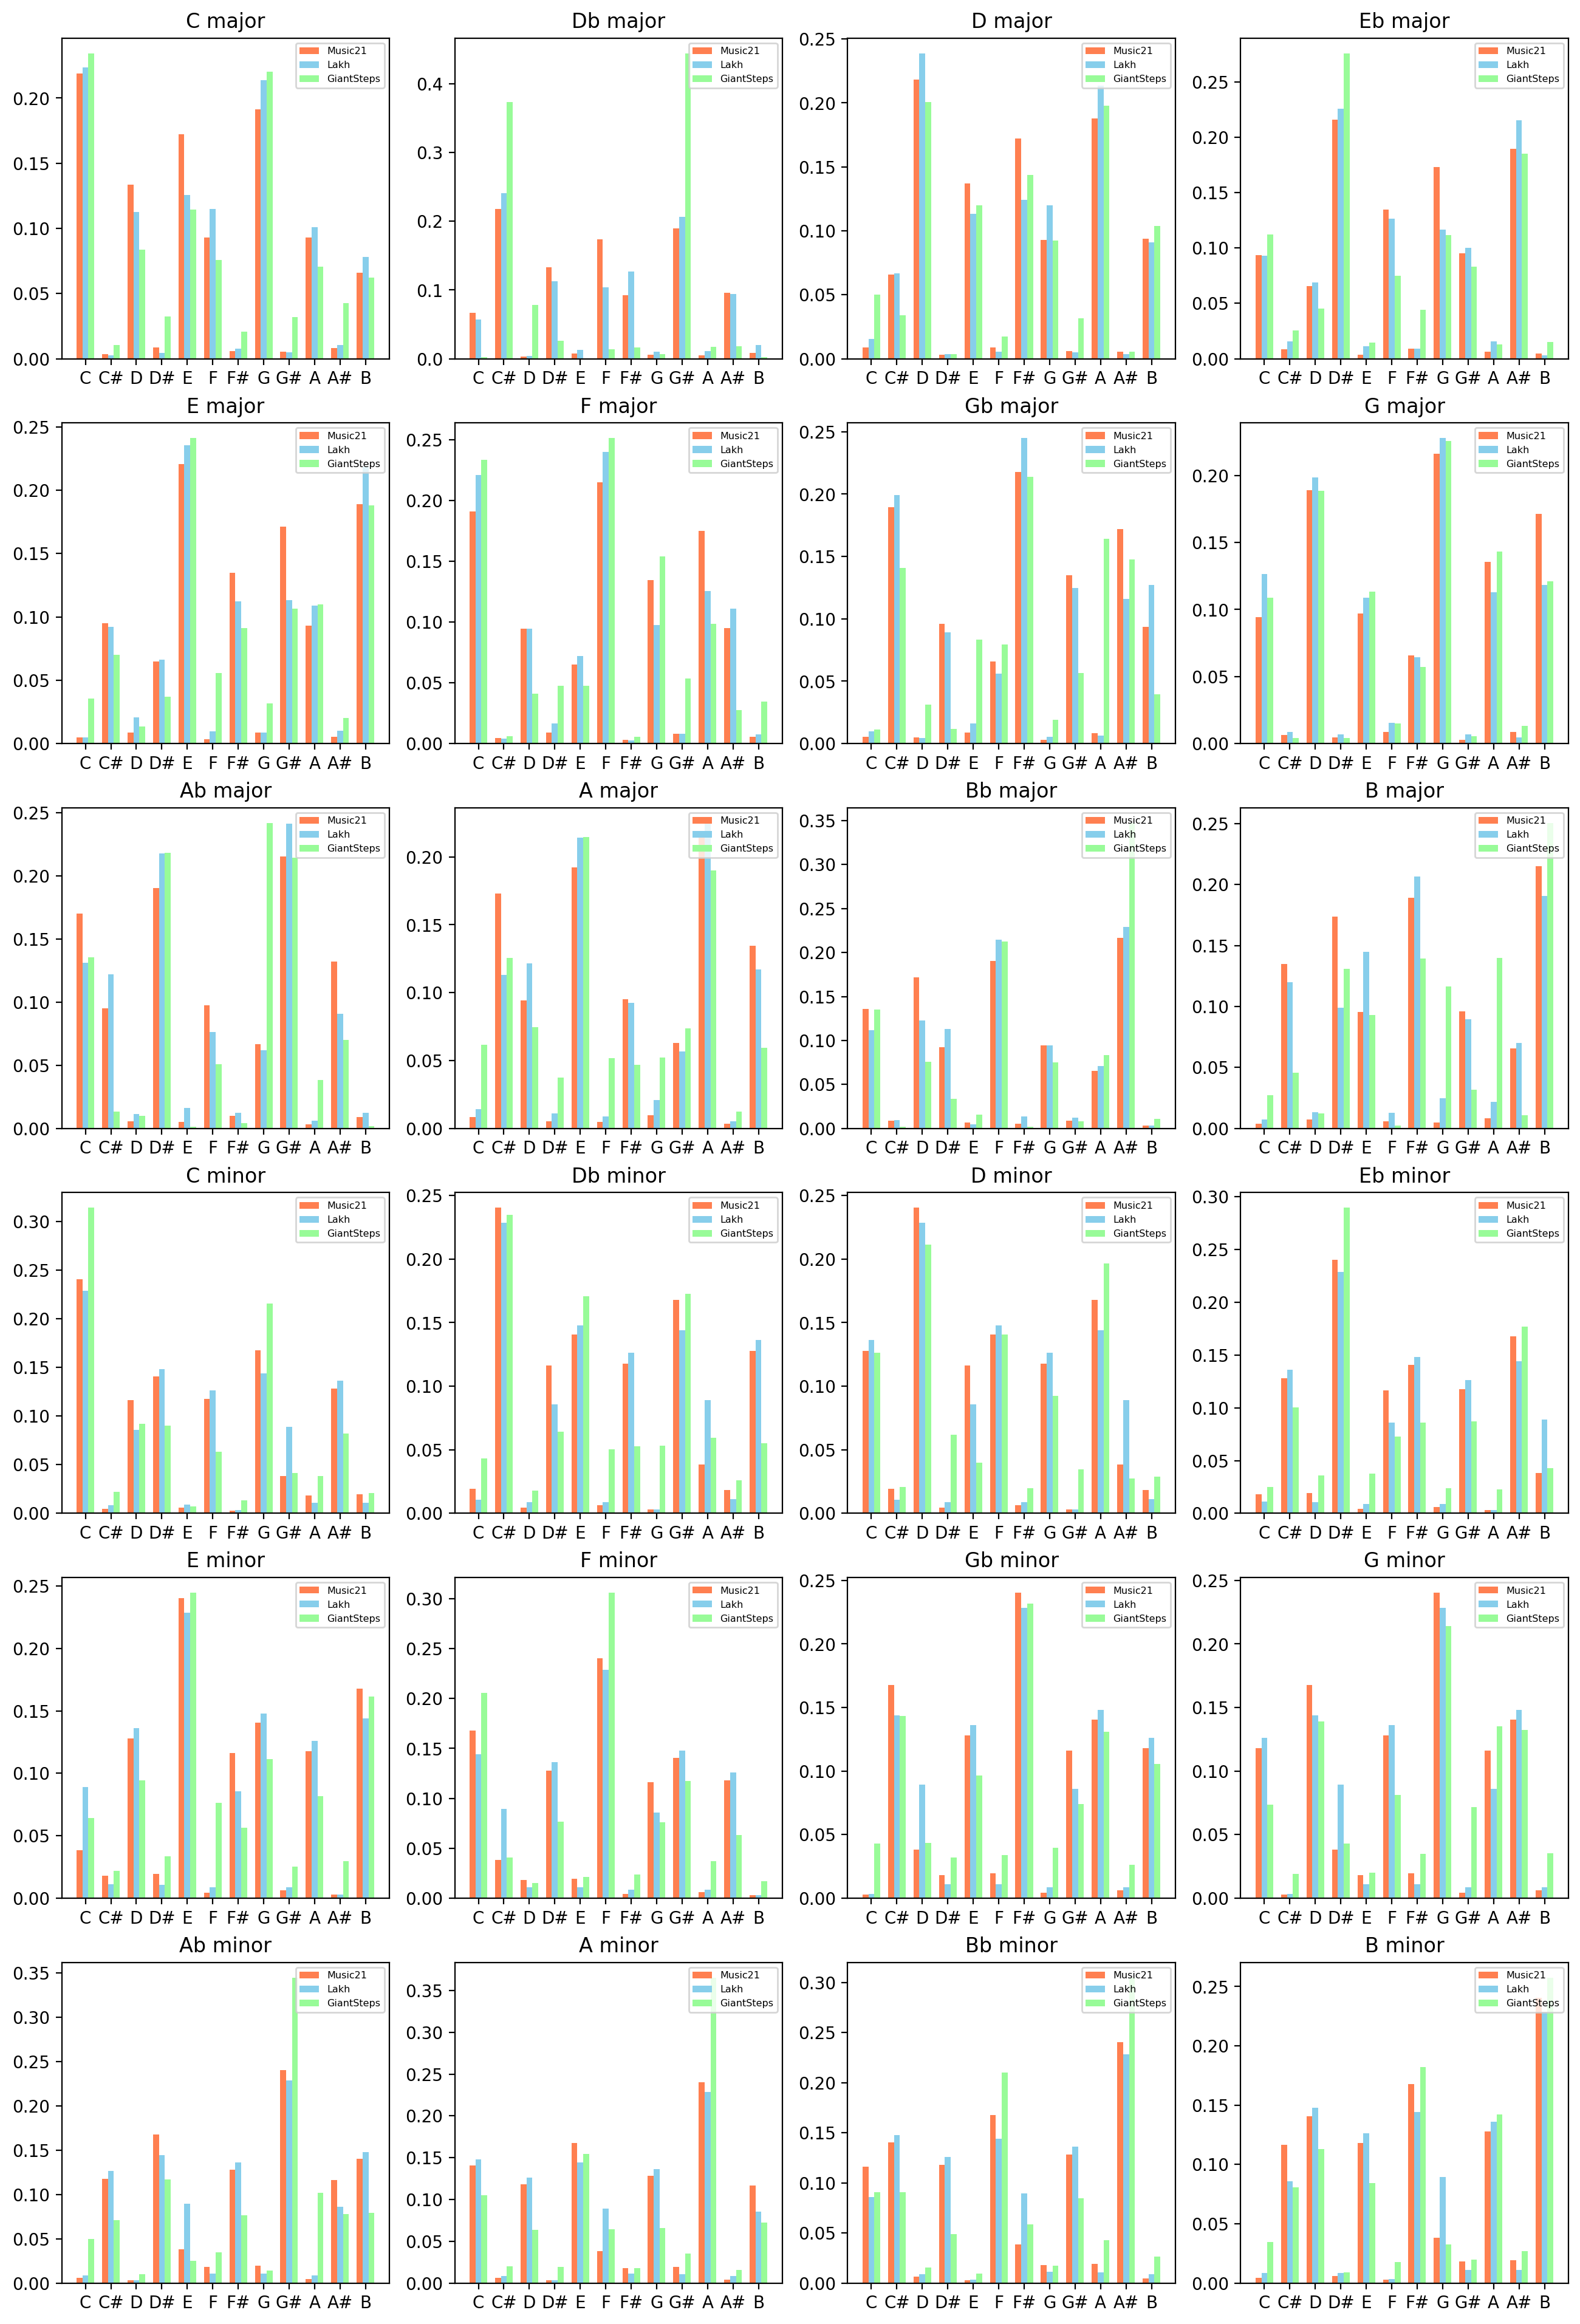

In [ ]:
PitchClasses = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
X_axis = np.arange(12)*2.6

fig, axs = plt.subplots(6, 4, figsize=(16, 24))
np.shape(axs)

for i in range(24):
  M = average_pcp(i, X_M, y_M)
  L = average_pcp(i, X_L, y_L)
  G = average_pcp(i, X_G, y_G)

  axs[i//4, i%4].bar(X_axis-0.6, M, 0.6 ,color ="coral", label = 'Music21')
  axs[i//4, i%4].bar(X_axis-0.0, L, 0.6 ,color ="skyblue", label = 'Lakh')
  axs[i//4, i%4].bar(X_axis+0.6, G, 0.6 ,color ="palegreen", label = 'GiantSteps')
  axs[i//4, i%4].set_xticks(X_axis, PitchClasses)
  axs[i//4, i%4].set_title(key_map[i])
  axs[i//4, i%4].legend(loc='upper right',fontsize='xx-small')


plt.show()

## The Success of LDA

In [ ]:
# Coefficients of the linear discriminants
lda_coefficients = classifier['LDA'].coef_

# If you want to print them
print("Coefficients of the linear discriminants:\n", lda_coefficients[0])

Coefficients of the linear discriminants:
 [549.79884745 465.22431782 509.11008632 464.18513052 526.85738667
 500.00851556 466.26592348 538.84396298 467.59560938 499.82949521
 466.83110881 490.54719357]


In [ ]:
def mode_then_tonic(X):
  y_preds = classifier['LDA'].predict(X)
  y_new = np.zeros(len(y_preds))
  major = major_key_profile#[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  minor = minor_key_profile#[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

  for i, y_pred in enumerate(y_preds):
    tonic_scores = np.zeros(12)
    pcp = X[i]
    if y_pred < 12:
      mask_0 = major
      mode = 0
    else:
      mask_0 = minor
      mode = 1
      for j in range(12):
        mask = np.roll(mask_0, j)
        tonic_scores[j] =  np.dot(mask, pcp)
    k = 0
    if pcp[(int(y_pred)%12+3)%12] > pcp[(int(y_pred)%12+4)%12]:
      k = 12
    y_new[i] = y_pred%12 + k#np.argmax(tonic_scores)+(mode*12)#y_pred%12 + k

  return y_new


In [ ]:
y_new = mode_then_tonic(X_M_test)
#y_new = classifier['LDA'].predict(X_M_test)
print("mode_then_tonic_accuracy = ", accuracy(y_M_test, y_new))

mode_then_tonic_accuracy =  0.7916184413580247


In [ ]:
count = 0
total = 0
for pred, actual in zip(y_new, y_M_test):
  if pred != actual:
    total += 1
    if (pred < 12 and actual < 12) or (pred > 12 and actual > 12):
      count += 1

print(count*100/total, "%")

25.896783152048137 %


In [ ]:
count = 0
total = 0
for pred, actual in zip(y_new, y_M_test):
  if pred != actual:
    total += 1
    if pred%12 == actual%12:
      count += 1

print(count*100/total, "%")

13.515389956028697 %


In [ ]:
0.8151041666666667 * 0.8197820216049382

0.6682077415686085

#Extracting our Trained Custom Model to use in Javascript

In [ ]:
!pip install tensorflowjs

In [ ]:
classifier['CUSTOM'].save('my_model.h5')

In [ ]:
# Define the model without the Lambda layer
model_no_lambda = tf.keras.Sequential([
    tf.keras.layers.InputLayer(batch_input_shape=(None, 23, 1)),
    tf.keras.layers.Conv1D(filters=2, kernel_size=12, name='conv1d_1'),
    tf.keras.layers.Permute((2, 1), name='permute_1'),
    tf.keras.layers.Reshape((24,), name='reshape_1'),
    tf.keras.layers.Dense(24, activation='softmax', name='dense_1')
])

# Build the new model by passing a dummy input to initialize layers
dummy_input = tf.random.normal([1, 23, 1])
model_no_lambda(dummy_input)


<tf.Tensor: shape=(1, 24), dtype=float32, numpy=
array([[0.01467833, 0.14890781, 0.11705281, 0.03288054, 0.05961791,
        0.09184559, 0.00628149, 0.03548577, 0.07803719, 0.02910251,
        0.01889155, 0.00430903, 0.0045562 , 0.02646987, 0.19677079,
        0.01014242, 0.00684385, 0.03244355, 0.01009845, 0.00591878,
        0.0046794 , 0.02572371, 0.01349658, 0.0257659 ]], dtype=float32)>

In [ ]:
model_no_lambda.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 12, 2)               │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ permute_1 (Permute)                  │ (None, 2, 12)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │             600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 626 (2.45 KB)

 Trainable params: 626 (2.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Map the layers correctly between the two models
layer_mapping = {
    'conv1d': 'conv1d_1',
    'permute': 'permute_1',
    'reshape': 'reshape_1',
    'dense': 'dense_1'
}

for layer in classifier['CUSTOM'].layers[1:]:  # Skip the Lambda layer
    if layer.name in layer_mapping:
        new_layer = model_no_lambda.get_layer(name=layer_mapping[layer.name])
        new_layer.set_weights(layer.get_weights())


In [ ]:
model_no_lambda.save('model_no_lambda.h5')


In [ ]:
!tensorflowjs_converter --input_format=keras model_no_lambda.h5 my_tfjs_model


2024-07-11 12:14:06.558784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 12:14:06.593022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 12:14:06.593107: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-11 12:14:08.032260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file
